# Russian Car Plate Detection

This mini-project is to detect Russian car plate and blur only detected ROI on the original image. 

In [ ]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [9]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize = (11,9))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

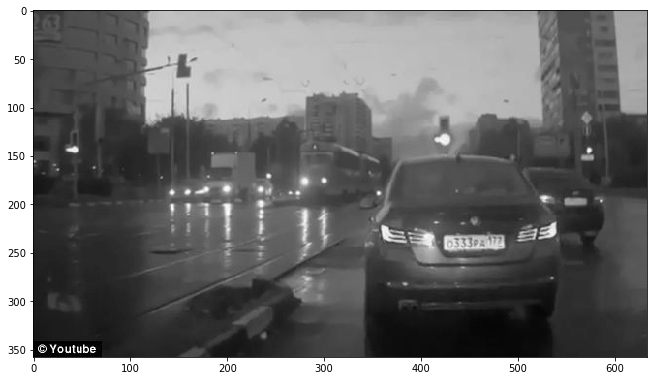

In [11]:
# open image
img = cv2.imread("Computer-Vision-with-Python/DATA/car_plate.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray_img)

In [12]:
# make cascade classifier
plate_cas = cv2.CascadeClassifier("Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml")

In [13]:
def detect_plate(sc):
    copy_img = sc.copy()
    
    plate_rect = plate_cas.detectMultiScale(copy_img, scaleFactor = 1.2, minNeighbors = 5)
    
    # now that we have our own ROI we can blur only that part
    return tuple(plate_rect[0])

In [14]:
coord = detect_plate(gray_img)

In [15]:
def blur_img(coord):
    x,y,w,h = coord
        
#     cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),20)
    # grab ROI
    roi = img[y:y+h, x:x+w]
    
    # blur that part
    blur_roi = cv2.medianBlur(roi, 19)
    
    # merge
    img[y:y+h, x:x+w] = blur_roi

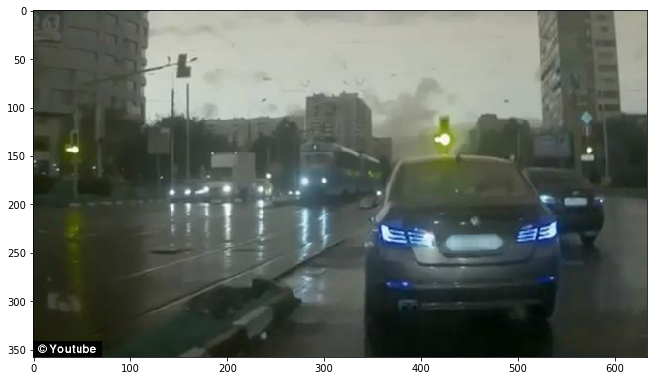

In [16]:
blur_img(coord)
display(img)